In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
df = pd.read_csv(filename, names= headers)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


# Table of content
- Identify and handle missing values
    - Identify missing values
    - Deal with missing values
    - Correct data format
- Data standardization
- Data Normalization (centering/scaling)
- Binning
- Indicator variable

# Identify and handle missing values

In [4]:
df.replace("?", np.nan, inplace=True)

In [5]:
df['normalized-losses'].isnull().value_counts()

False    164
True      41
Name: normalized-losses, dtype: int64

In [6]:
# loop for knowing missing values in each columns
for col in df.columns:
    print(df[col].isnull().value_counts())
    print()

False    205
Name: symboling, dtype: int64

False    164
True      41
Name: normalized-losses, dtype: int64

False    205
Name: make, dtype: int64

False    205
Name: fuel-type, dtype: int64

False    205
Name: aspiration, dtype: int64

False    203
True       2
Name: num-of-doors, dtype: int64

False    205
Name: body-style, dtype: int64

False    205
Name: drive-wheels, dtype: int64

False    205
Name: engine-location, dtype: int64

False    205
Name: wheel-base, dtype: int64

False    205
Name: length, dtype: int64

False    205
Name: width, dtype: int64

False    205
Name: height, dtype: int64

False    205
Name: curb-weight, dtype: int64

False    205
Name: engine-type, dtype: int64

False    205
Name: num-of-cylinders, dtype: int64

False    205
Name: engine-size, dtype: int64

False    205
Name: fuel-system, dtype: int64

False    201
True       4
Name: bore, dtype: int64

False    201
True       4
Name: stroke, dtype: int64

False    205
Name: compression-ratio, dtype: int64

F

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

In [7]:
mean_norm_loss = df['normalized-losses'].astype('float').mean()
df['normalized-losses'].replace(np.nan, mean_norm_loss, inplace=True)

In [9]:
mean_bore_loss = df['bore'].astype('float').mean()
df['bore'].replace(np.nan, mean_bore_loss, inplace=True)

In [10]:
mean_stroke_loss = df['stroke'].astype('float').mean()
df['stroke'].replace(np.nan, mean_stroke_loss, inplace=True)

In [11]:
mean_horsepower_loss = df['horsepower'].astype('float').mean()
df['horsepower'].replace(np.nan, mean_horsepower_loss, inplace=True)

In [12]:
mean_rpm_loss = df['peak-rpm'].astype('float').mean()
df['peak-rpm'].replace(np.nan, mean_rpm_loss, inplace=True)

In [15]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [16]:
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

In [18]:
df['peak-rpm'] = df['peak-rpm'].astype('int')

In [20]:
df['horsepower'] = df['horsepower'].astype(int)

In [23]:
df['stroke'] = df['stroke'].astype(float)

In [25]:
df['bore'] = df['bore'].astype(float)

In [27]:
df['normalized-losses'] = df['normalized-losses'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [33]:
df.dropna(subset=['price'], inplace= True)

In [34]:
df.price = df.price.astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int32  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [36]:
df.to_csv('automobiles.csv')

# data standardization

In [37]:
df['city-mpg'] # needs to be coverted

0      21
1      21
2      19
3      24
4      18
       ..
200    23
201    19
202    18
203    26
204    19
Name: city-mpg, Length: 201, dtype: int64

In [38]:
df['city-kml'] = 235/df['city-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-kml
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,13.055556


# data normalization or scaling

In [47]:
df['peak-rpm'] = df['peak-rpm']/ df['peak-rpm'].max()

In [48]:
df['city-kml'] = df['city-kml'] / df['city-kml'].max()

In [49]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-kml
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,0.757576,21,27,13495,0.619048
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,0.757576,21,27,16500,0.619048
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,0.757576,19,26,16500,0.684211
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,0.833333,24,30,13950,0.541667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,0.833333,18,22,17450,0.722222


# binning 

In [50]:
group_names = ['low','medium','high']

In [52]:
bins = np.linspace(df.horsepower.min(), df.horsepower.max(),4 )

In [53]:
df['hp-binned'] = pd.cut(df.horsepower,bins, labels=group_names,include_lowest=True)

In [55]:
df['hp-binned'].value_counts()

low       153
medium     43
high        5
Name: hp-binned, dtype: int64

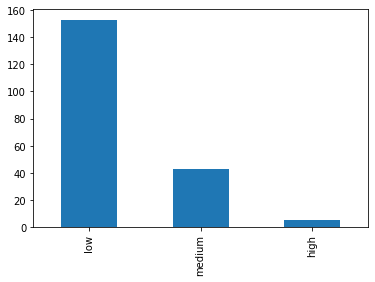

In [56]:
df['hp-binned'].value_counts().plot(kind='bar')

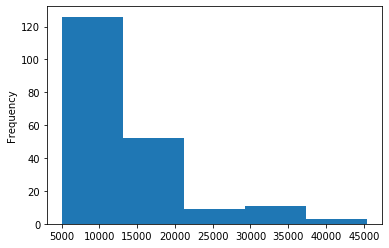

In [57]:
df['price'].plot.hist(bins=5)

# indicator variable or dummy variable

In [60]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [61]:
dummy_var1 = pd.get_dummies(df['fuel-type'])

In [63]:
dummy_var2 = pd.get_dummies(df['make'])

In [65]:
# merge the dummy var in df and drop the orignal col
df = pd.concat([df, dummy_var1[:-1], dummy_var2[:-1]], axis=1)

In [70]:
df.drop(columns=['fuel-type','make'],inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   normalized-losses  201 non-null    int32   
 2   aspiration         201 non-null    object  
 3   num-of-doors       201 non-null    object  
 4   body-style         201 non-null    object  
 5   drive-wheels       201 non-null    object  
 6   engine-location    201 non-null    object  
 7   wheel-base         201 non-null    float64 
 8   length             201 non-null    float64 
 9   width              201 non-null    float64 
 10  height             201 non-null    float64 
 11  curb-weight        201 non-null    int64   
 12  engine-type        201 non-null    object  
 13  num-of-cylinders   201 non-null    object  
 14  engine-size        201 non-null    int64   
 15  fuel-system        201 non-null    object  
 16  bore    

In [75]:
df['num-of-doors'].nunique() # not neccesssary to convert to dummy if you have 2 values only

2

In [78]:
df['engine-type'].nunique()

6

In [82]:
df['num-of-doors'].replace('two',0,inplace=True)
df['num-of-doors'].replace('four',1,inplace=True)
df.head()

,symboling,normalized-losses,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122,std,0,convertible,rwd,front,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,122,std,0,convertible,rwd,front,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,122,std,0,hatchback,rwd,front,94.5,171.2,65.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,164,std,1,sedan,fwd,front,99.8,176.6,66.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,164,std,1,sedan,4wd,front,99.4,176.6,66.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
pd.get_dummies(df['engine-type'])

,dohc,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
200,0,0,1,0,0,0
201,0,0,1,0,0,0
202,0,0,0,0,1,0
203,0,0,1,0,0,0
